# 1. Plotting in Python and Jupyter Notebooks

## Importing packages

Once you open up a new python session (called a "kernel" in tech speak), before you can use any packages that you have installed you have to first `import` them.

Some packages, such as matplotlib, are large so they are organized into *modules* that can seperately imported using a `.` seperator e.g.

`import package.module`

packages with longer names are typically imported with the `as` keyword to give them a shorter nickname, called the **namespace**. Note that some packages have standard import conventions like those used by matplotlib and numpy below and its best to follow those. 

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In Python namespaces are used to differentiate which functions are from which package. So two packages `pkgA` and `pkgB` could have functions with the same name `func` that do different things, so you can use both in the session by calling them as `pkgA.func` and `pkgB.func`

## Familiarizing yourself with the plotting functions available in a package

- The best place to get started with a new plotting package is checking out their website and gallery page to see what plots look most like what you are looking.
- Then use their code examples as templates for your own code.

We will be basing this example off of matplotlib's bar chart demo from [their gallery page](https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py)

- If you have time I recommend you go through it yourself to get a feel for working with their package.

## Our first bar chart using `plt.bar`
- This is the core bar char function in matplotlib, you can learn more about the specific details of how to use it by using the `?` for help

### Getting help with `?`

To learn more about any function, start by typing out the name of the function followed (or preceded by a `?`), this will give you the most accurate information of your specific version as sometimes the internet can be outdated or contradictory

`?` is meant more as a reminder of how to use a function, for a full explanation and help consult their [website](https://matplotlib.org/tutorials/index.html) and [other tutorials](https://matplotlib.org/resources/index.html#tutorials)

In [20]:
plt.bar?

Signature:
plt.bar(
    x,
    height,
    width=0.8,
    bottom=None,
    *,
    align='center',
    data=None,
    **kwargs,
)
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *width* and *height*. The vertical baseline
is *bottom* (default 0).

Each of *x*, *height*, *width*, and *bottom* may either be a scalar
applying to all bars, or it may be a sequence of length N providing a
separate value for each bar.

Parameters
----------
x : sequence of scalars
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : scalar or sequence of scalars
    The height(s) of the bars.

width : scalar or array-like, optional
    The width(s) of the bars (default: 0.8).

bottom : scalar or array-like, optional
    The y coordinate(s) of the bars bases (default: 0).

align : {'center', 'edge'}, optional, default: 'center'
    Alignment of the bars to the *x* coordinates:

 

## Make some random data

In [5]:
height = np.abs(np.random.randn(8))
height

array([1.33373473, 0.13080726, 0.69559323, 0.13522727, 1.32973283,
       0.25402773, 0.6793011 , 0.06060702])

In [6]:
x = list(range(len(height)))
x

[0, 1, 2, 3, 4, 5, 6, 7]

In [7]:
len?

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method


You can also have `?` at the start or end of a command and will get the same help result

In [8]:
?len

Signature: len(obj, /)
Docstring: Return the number of items in a container.
Type:      builtin_function_or_method


In [9]:
range?

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     


In [10]:
list?

Init signature: list(iterable=(), /)
Docstring:     
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.
Type:           type
Subclasses:     _HashedSeq, StackSummary, DeferredConfigList, SList, _ImmutableLineList, FormattedText, NodeList, _ExplodedList, Stack, _Accumulator, ...


<BarContainer object of 8 artists>

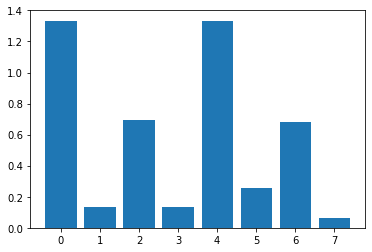

In [11]:
plt.bar(list(range(len(x))), height)

Matplotlib is a *declarative* style library, meaning that you build up your plot sequentially, adding on commands.

Text(0, 0.5, 'Relative intesity')

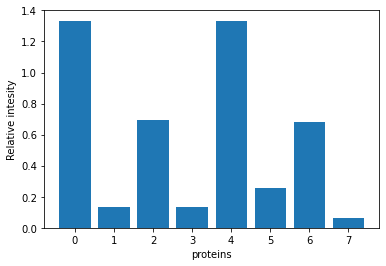

In [12]:
plt.bar(list(range(len(x))), height)
plt.xlabel("proteins")
plt.ylabel("Relative intesity")

## Make some random sample labels

In [13]:
import random
import string

def get_random_string(length):
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(length))

In [14]:
get_random_string(3)

'uwf'

Below we perfom what is called a 'list comprehension' it is one of the most powerful features of Python and is worth taking some time to learn more about: [tutorial on list comprehensions](https://realpython.com/list-comprehension-python/)

In [15]:
protein_names = [get_random_string(3) for i in range(len(height))]
protein_names

['xrc', 'ffu', 'eig', 'xlo', 'lac', 'wrr', 'apb', 'hha']

Adding `plt.show()` or `plt.savefig(...)` signifies the end of your plot building statements for that particular figure.

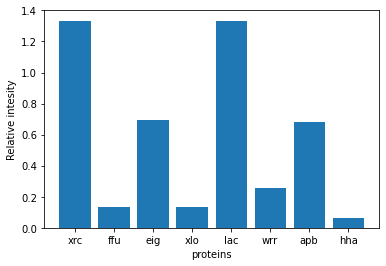

In [16]:
fig, ax = plt.subplots()
ax.bar(list(range(len(x))), height)
plt.xlabel("proteins")
plt.ylabel("Relative intesity")
ax.set_xticks(x)
ax.set_xticklabels(protein_names)
plt.show()

## Adding Error bars

if you look back at the results from `plt.bar?`, under 'Other Parameters', you'll find options for x-error and y-error, xerr, and yerr, respectively.

```python
"""

Other Parameters
----------------
color : scalar or array-like, optional
    The colors of the bar faces.

edgecolor : scalar or array-like, optional
    The colors of the bar edges.

linewidth : scalar or array-like, optional
    Width of the bar edge(s). If 0, don't draw edges.

tick_label : str or array-like, optional
    The tick labels of the bars.
    Default: None (Use default numeric labels.)

xerr, yerr : scalar or array-like of shape(N,) or shape(2, N), optional
    If not *None*, add horizontal / vertical errorbars to the bar tips.
    The values are +/- sizes relative to the data:

    - scalar: symmetric +/- values for all bars
    - shape(N,): symmetric +/- values for each bar
    - shape(2, N): Separate - and + values for each bar. First row
      contains the lower errors, the second row contains the upper
      errors.
    - *None*: No errorbar. (Default)

    See :doc:`/gallery/statistics/errorbar_features`
    for an example on the usage of ``xerr`` and ``yerr``.
"""
```

In [29]:
def make_y_error(): return np.abs(np.random.randn(len(height)))*0.1
y_error = make_y_error()
y_error

array([0.04196576, 0.00239953, 0.04542829, 0.06244174, 0.1225778 ,
       0.08952903, 0.07148163, 0.00871609])

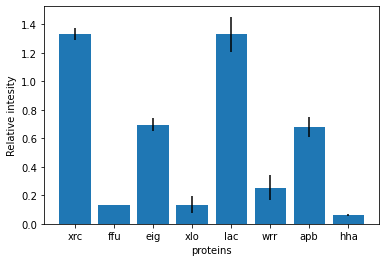

In [30]:
fig, ax = plt.subplots()
ax.bar(list(range(len(x))), height, yerr=y_error)
plt.xlabel("proteins")
plt.ylabel("Relative intesity")
ax.set_xticks(x)
ax.set_xticklabels(protein_names)
plt.show()

## Wrap it up into a function
It's good practice to make functions whenever it makes sense to.

To do this start with your inputs, here your protein intensities and names, and then put all of the intermediate calculations and values in the function to hide them away

In [33]:
def make_bar_plot(protein_names, heights, error=make_y_error()):
    x = list(range(len(height)))
    fig, ax = plt.subplots()
    ax.bar(list(range(len(x))), height, yerr=error)
    plt.xlabel("proteins")
    plt.ylabel("Relative intesity")
    ax.set_xticks(x)
    ax.set_xticklabels(protein_names)

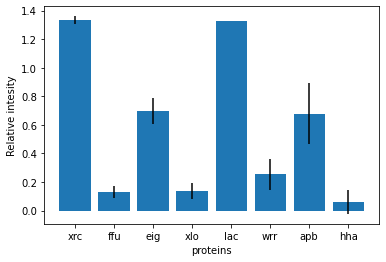

In [34]:
make_bar_plot(protein_names, height)

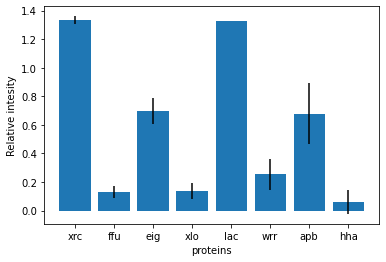

In [36]:
make_bar_plot(protein_names, height)
plt.savefig('mybarplot.png')

Now see that your plot has been saved

In [37]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '01_plotting.ipynb',
 '02_plotting_from_spreadsheets.ipynb',
 '03_numpy.ipynb',
 'background.md',
 'images',
 'mybarplot.png',
 'programming_environments.md',
 'random_data.csv',
 'README.md',
 'utils.py',
 '__pycache__']

## Save it for later

Once you make a plotting function you like, its best practice to save it in a `.py` file (e.g. `plot_templates.py`) so you can reuse them later to save time and effort in the future.

Try this now by making `plot_templates.py` and including all of the necesarry bits above to make your function then call it below as follows...

In [38]:
import plot_templates

plot_templates.make_bar_plot(protein_names, height)

ModuleNotFoundError: No module named 'plot_templates'

## Making subplots

Let's copy paste some of our old code into a new function,

specifically we will remove the `fig, ax = plt.subplots()` statement and move it outside and feed an axis `ax` as a new argument

In [46]:
def make_bar_subplot(protein_names, heights, error=make_y_error(), ax=1):
    x = list(range(len(height)))
    ax.bar(list(range(len(x))), height, yerr=error)
    plt.xlabel("proteins")
    plt.ylabel("Relative intesity")
    ax.set_xticks(x)
    ax.set_xticklabels(protein_names)

In [47]:
def random_heights(n=8): return np.abs(np.random.randn(n))

In [48]:
def random_names(height): return [get_random_string(3) for i in range(len(height))]

These functions have been moved into `utils.py` to be called from later notebooks

In [49]:
random_heights()

array([0.42418646, 0.23683941, 0.18714688, 0.81483527, 1.42961807,
       0.22073643, 0.69471557, 0.22420632])

In [50]:
random_names(height)

['vyl', 'nuc', 'jaa', 'otv', 'chw', 'ykd', 'ufm', 'dyp']

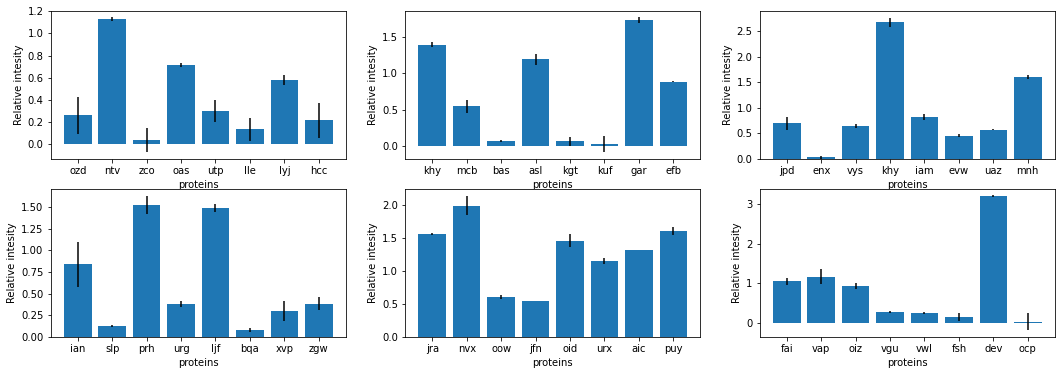

In [53]:
fig = plt.figure(figsize=(18,6))
for i in range(6):
    ax = plt.subplot(2,3,i+1)
    height = random_heights()
    protein_names = random_names(height)
    make_bar_subplot(protein_names, height, error = make_y_error(), ax=ax)
plt.show()

# Conclusions
 - This concludes our discussion of setting up a programming environment in python
 - Next is [plotting from spread sheet data](02_plotting_from_spreadsheets.ipynb)
 - Back to [index](README.md)